In [ ]:
# DBSCAN Clustering model:

In [ ]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score


In [ ]:
# Define the eps_values and min_samples using np.arange
eps_values = np.arange(0.2, 1.4, 0.2)
min_samples = np.arange(3, 10)

best_silhouette_score = -1  # Initialize with a minimum value
best_eps = None
best_min_samples = None

for eps in eps_values:
    for samples in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=samples)
        clusters = dbscan.fit_predict(rfm_df_scaled)

        # Silhouette score
        if len(set(clusters)) > 1:  # Silhouette score is only meaningful if there are more than 1 cluster
            silhouette_avg = silhouette_score(rfm_df_scaled, clusters)
            print(f"For eps={eps}, min_samples={samples}, the silhouette score is {silhouette_avg}")

            # Check if the current score is the best so far
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = samples

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Epsilon: {best_eps}")
print(f"Optimal Min Samples: {best_min_samples}")


For eps=0.2, min_samples=3, the silhouette score is 0.15887430201470013
For eps=0.2, min_samples=4, the silhouette score is 0.17113641048490752
For eps=0.2, min_samples=5, the silhouette score is 0.19538035854543184
For eps=0.2, min_samples=6, the silhouette score is 0.2603763516433458
For eps=0.2, min_samples=7, the silhouette score is 0.4442457194645027
For eps=0.2, min_samples=8, the silhouette score is 0.43545450044238493
For eps=0.2, min_samples=9, the silhouette score is 0.11458648934017174
For eps=0.4, min_samples=3, the silhouette score is 0.3316893725809083
For eps=0.4, min_samples=4, the silhouette score is 0.3977508946073281
For eps=0.4, min_samples=5, the silhouette score is 0.4796297525794447
For eps=0.4, min_samples=6, the silhouette score is 0.5278091554852952
For eps=0.4, min_samples=7, the silhouette score is 0.5270086660954744
For eps=0.4, min_samples=8, the silhouette score is 0.5571149035543955
For eps=0.4, min_samples=9, the silhouette score is 0.5335793245619321
F

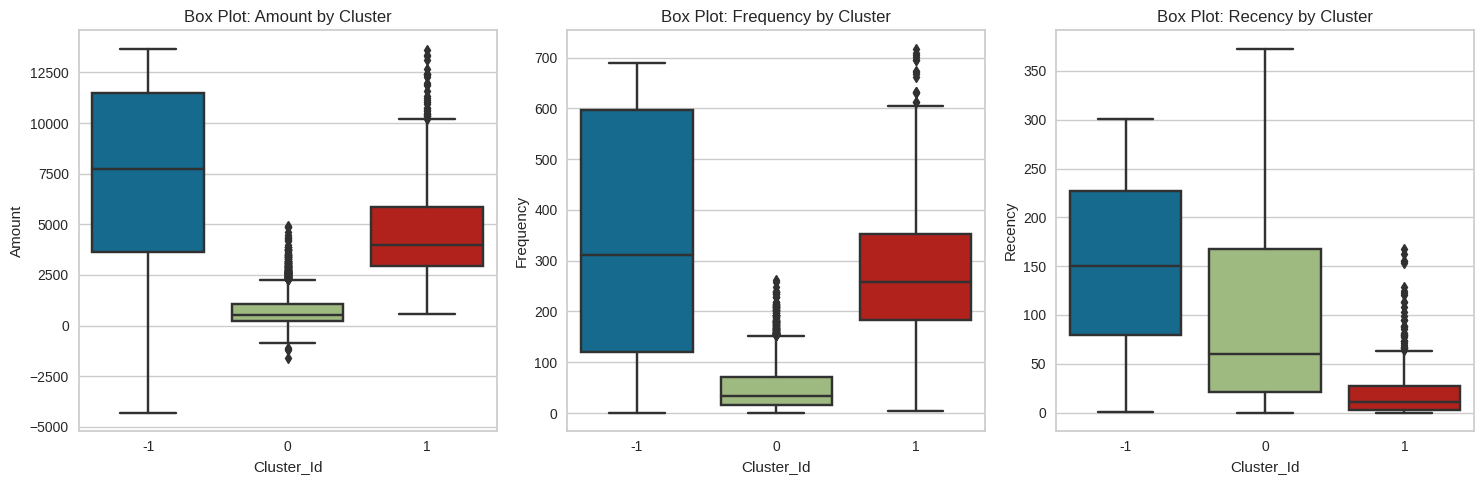

In [ ]:
# Given optimal values
chosen_eps = best_eps
chosen_min_samples = best_min_samples

#Plotting box plots using the chosen optimal values
dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
clusters = dbscan.fit_predict(rfm_df_scaled)

rfm['Cluster_Id'] = clusters

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)
plt.title('Box Plot: Amount by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)
plt.title('Box Plot: Frequency by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)
plt.title('Box Plot: Recency by Cluster')

plt.tight_layout()
plt.show()




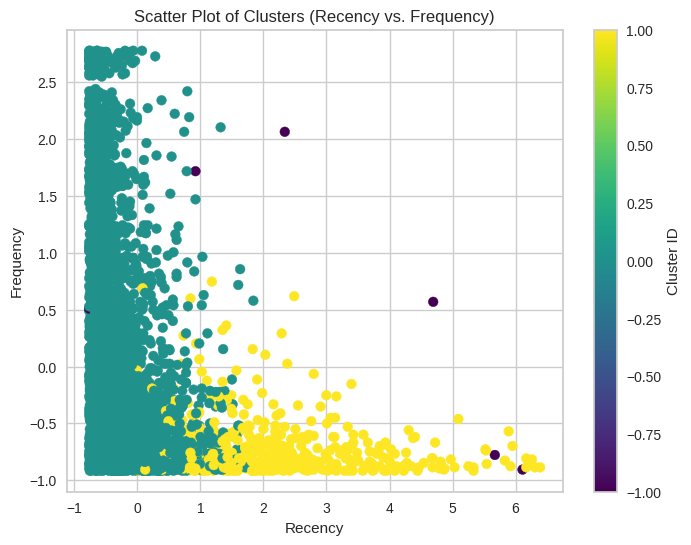

In [ ]:
#Scatter plot using optimal clustering
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(rfm_df_scaled)

# Adding clusters to the DataFrame
rfm_df_scaled['Cluster_Id'] = clusters

# Plotting the clusters using scatter plot for recency vs frequency
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df_scaled['Frequency'], rfm_df_scaled['Recency'], c=clusters, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Clusters (Recency vs. Frequency)')
plt.colorbar(label='Cluster ID')
plt.show()

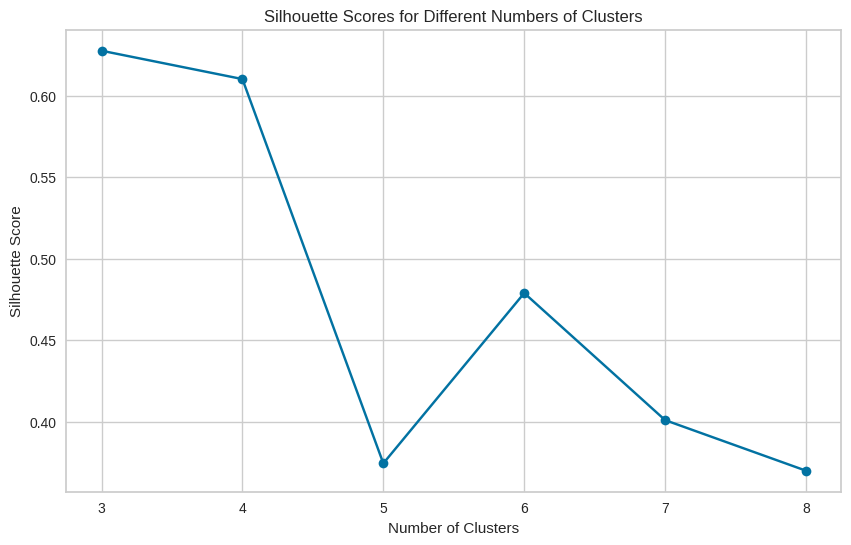

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()